# Final Project Submission

Please fill out:
* Student name: James Benedito 
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# Introduction

Microsoft is a company that was 

# Problem

Microsoft wants to launch a new movie studio. However, they don't have experience making films. They need help analyzing data to inform their decision of the types of movies to make. 

In addition, the global COVID-19 pandemic has impacted the film industry. Movie-going has decreased by (include stat, cite)

# Variables to Consider

To help Microsoft decide which direction to go in, I will analyze the following datasets:
- im.db
- tmdb_movies.csv
- tn.movie_budgets.csv

In particular, I will look at movies with the highest worldwide gross and highest ratings to see what genres Microsoft should consider, the optimal film length, and the optimal budget range.

# Genre

To decide 

In [1]:
# importing relevant packages
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# connecting to sqlite3 to open im.db
conn = sqlite3.connect('zippedData\\im.db')

In [4]:
# exploring info in movie_basics table
q = """
SELECT *
FROM movie_basics
"""
movie_basics_df = pd.read_sql(q, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
# exploring info in movie_ratings table
q = """
SELECT *
FROM movie_ratings
"""
movie_ratings_df = pd.read_sql(q, conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [34]:
# Top 10 movies with the highest average rating and their genres
# Filtered by number of votes (greater than 100,000)
q = """
SELECT genres AS Genres, averagerating AS Average_Rating, numvotes AS Number_of_Votes, start_year AS Year
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE Number_of_Votes > 100000
ORDER BY Average_Rating DESC
LIMIT 10
"""
rating_by_genre = pd.read_sql(q, conn)
rating_by_genre

,Genres,Average_Rating,Number_of_Votes,Year
0,"Action,Drama,War",9.3,100568,2016
1,"Action,Adventure,Sci-Fi",8.8,441135,2019
2,"Action,Adventure,Sci-Fi",8.8,1841066,2010
3,"Adventure,Drama,Sci-Fi",8.6,1299334,2014
4,"Biography,Comedy,Drama",8.5,677343,2011
5,"Drama,Music",8.5,616916,2014
6,"Action,Adventure,Animation",8.5,210869,2018
7,"Action,Biography,Drama",8.5,123638,2016
8,"Action,Adventure,Sci-Fi",8.5,670926,2018
9,"Action,Thriller",8.4,1387769,2012


# Film Length

In [35]:
# Top 10 movies with highest average ratings and their runtimes
q = """
SELECT runtime_minutes, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes > 100000
ORDER BY averagerating DESC
LIMIT 10
"""
averagerating_runtime = pd.read_sql(q, conn)
averagerating_runtime

,runtime_minutes,averagerating,numvotes
0,135.0,9.3,100568
1,148.0,8.8,1841066
2,181.0,8.8,441135
3,169.0,8.6,1299334
4,112.0,8.5,677343
5,106.0,8.5,616916
6,149.0,8.5,670926
7,117.0,8.5,210869
8,161.0,8.5,123638
9,164.0,8.4,1387769


In [36]:
# Bottom 10 movies with lowest average ratings and their runtimes
q = """
SELECT runtime_minutes, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes > 100000
ORDER BY averagerating ASC
LIMIT 10
"""
averagerating_runtime = pd.read_sql(q, conn)
averagerating_runtime

,runtime_minutes,averagerating,numvotes
0,103.0,4.1,137734
1,125.0,4.1,279126
2,96.0,4.3,103608
3,100.0,4.3,140148
4,100.0,4.8,181687
5,117.0,4.9,208387
6,124.0,5.0,211733
7,94.0,5.1,100520
8,116.0,5.2,186788
9,120.0,5.2,155344


# Budget

To decide what the optimal budget range is the tn.movie_budgets.csv dataset will be explored.

In [2]:
# Movie budgets
movie_budgets = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
movie_budgets.info()
#production_budget, domestic_gross, worldwide_gross are dtype obj because they have $ and commas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
#convert production_budget to int by getting rid of $ and commas
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype('int64')

In [5]:
#convert domestic_gross to int by getting rid of $ and commas
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype('int64')

In [6]:
#convert worldwide_gross to int by getting rid of $ and commas
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype('int64')

In [7]:
#checking to see that production_budget, domestic_gross, and worldwide_gross were converted to int dtype
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [8]:
movie_budgets.corr(method='pearson')

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


As expected, production budget has a strong positive correlation with worldwide gross (r is about 0.75). Let's create a scatterplot to better visualize the data.

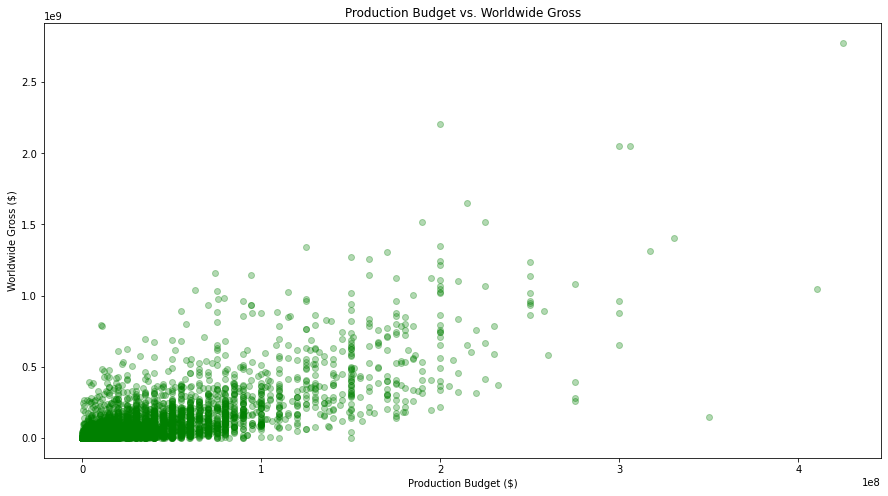

In [11]:
# Set up plot
fig, ax = plt.subplots(figsize=(15,8))

# Plot Age vs. SalePrice
ax.scatter(movie_budgets["production_budget"], movie_budgets["worldwide_gross"], alpha=0.3, color="green")
ax.set_title("Production Budget vs. Worldwide Gross")
ax.set_xlabel("Production Budget ($)")
ax.set_ylabel("Worldwide Gross ($)");